In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")  # download it from Kaggle and load
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [11]:
df.shape

(200, 5)

In [13]:
df.isna().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [17]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(X)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


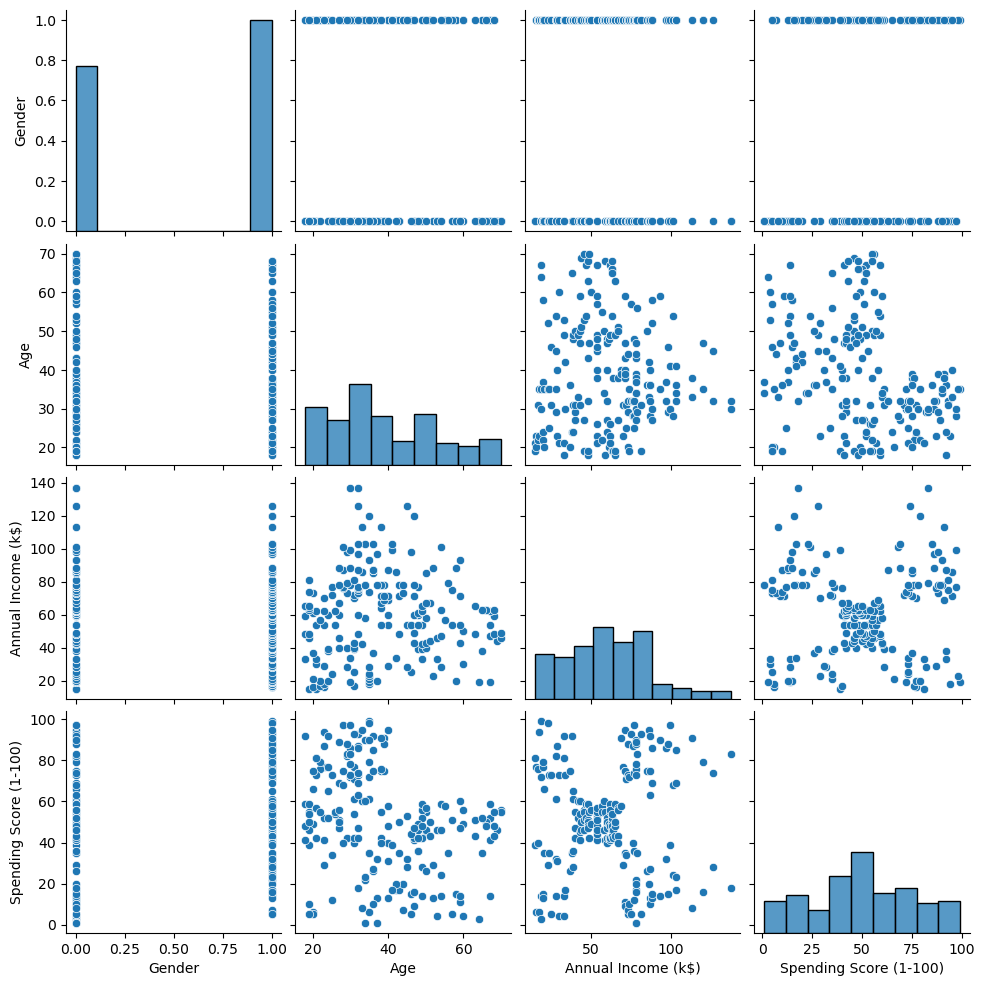

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

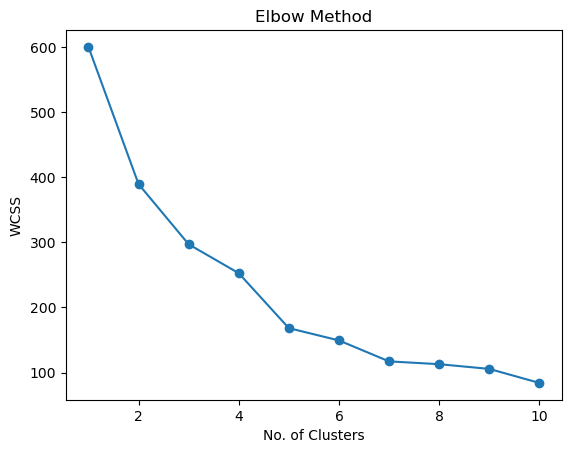

In [31]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
k = 5  # you can change based on elbow curve
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

# Load data
df = pd.read_csv("Mall_Customers.csv")

# Convert Gender to numerical if needed (optional for clustering)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)

# ✅ Save scaler and model to files
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("✅ scaler.pkl and kmeans_model.pkl saved.")


✅ scaler.pkl and kmeans_model.pkl saved.


In [37]:
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("kmeans_model.pkl", "rb") as f:
    model = pickle.load(f)

X_scaled = scaler.transform(X)
predictions = model.predict(X_scaled)


In [39]:
import pickle

with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

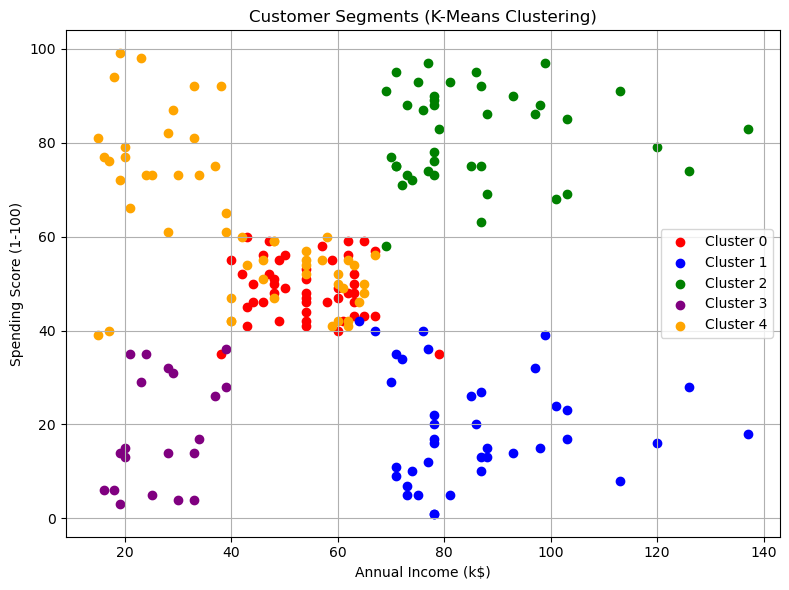

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Load data
df = pd.read_csv("Mall_Customers.csv")

# Preprocess
df_clean = df.copy()
df_clean['Gender'] = df_clean['Gender'].map({'Male': 0, 'Female': 1})
df_clean.drop('CustomerID', axis=1, inplace=True)

# Features for model
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_clean[features]

# Load scaler and model
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("kmeans_model.pkl", "rb") as f:
    kmeans = pickle.load(f)

# Scale the data
X_scaled = scaler.transform(X)

# Predict clusters
clusters = kmeans.predict(X_scaled)
df_clean['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for cluster in range(5):  # since you mentioned clusters 0-4
    cluster_data = df_clean[df_clean['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}',
                color=colors[cluster])

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
